<a href="https://colab.research.google.com/github/Vikkzhere/E-commerce-Anonamly-Detection/blob/main/%20Detection%20Automation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Webshop Cart Anomaly Detection using Isolation Forest

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
import datetime



In [ ]:
#  Simulate Webshop Cart Data
np.random.seed(42)
hours = pd.date_range("2025-06-18 00:00", "2025-06-18 23:00", freq="H")
cart_events = np.random.poisson(lam=200, size=len(hours))

# Introduce anomalies
cart_events[5] = 50   # drop
cart_events[15] = 400 # spike

data = pd.DataFrame({
    "timestamp": hours,
    "cart_additions": cart_events
})



<ipython-input-3-3084022251>:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hours = pd.date_range("2025-06-18 00:00", "2025-06-18 23:00", freq="H")


In [ ]:
# 2️⃣ Isolation Forest for Anomaly Detection
model = IsolationForest(contamination=0.1, random_state=42)



In [ ]:
# 3️⃣ Train the Model on the Data
data['score'] = model.fit_predict(data[['cart_additions']])



In [ ]:
# 4️⃣ Detect Anomalies
data['anomaly'] = data['score'] == -1



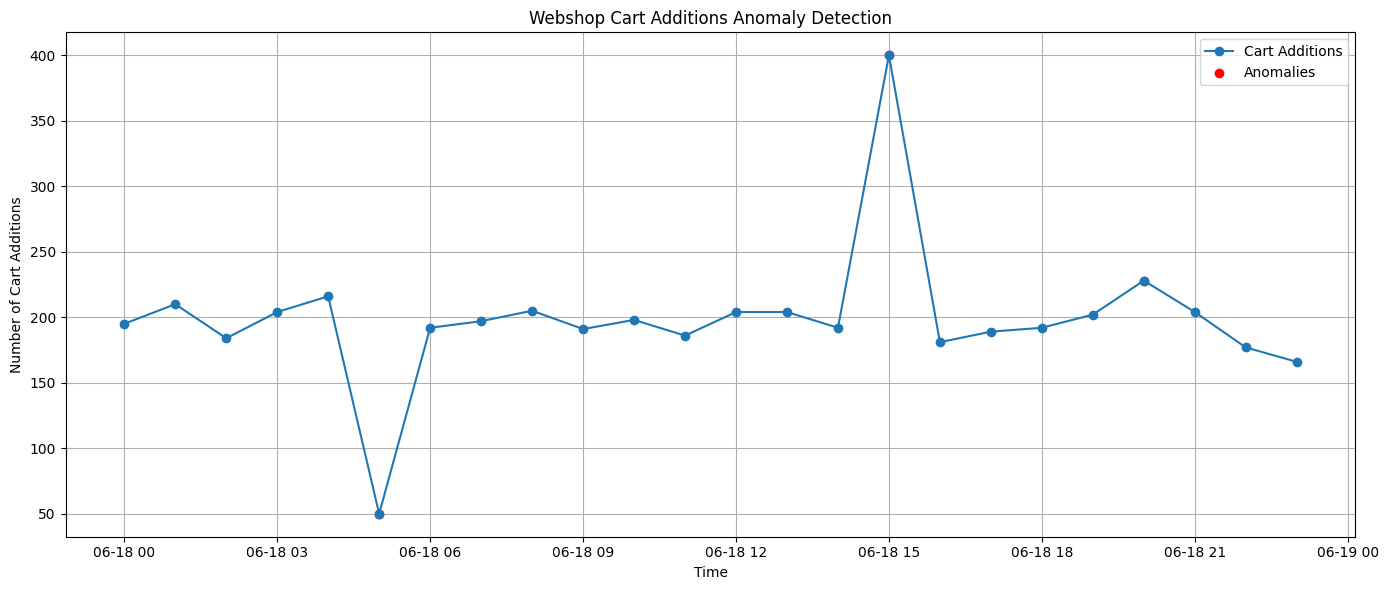

In [ ]:
# 5️⃣ Visualization
plt.figure(figsize=(14, 6))
plt.plot(data['timestamp'], data['cart_additions'], label='Cart Additions', marker='o')
plt.scatter(data[data['anomaly']]['timestamp'],
            data[data['anomaly']]['cart_additions'],
            color='red', label='Anomalies')
plt.xlabel('Time')
plt.ylabel('Number of Cart Additions')
plt.title('Webshop Cart Additions Anomaly Detection')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
# 6️⃣ Trigger Email if Anomalies Found
def send_email(alert_data):
    sender_email = "your_email@example.com"
    receiver_email = "it_team@example.com"
    subject = "🛑 Webshop Cart Anomaly Detected"
    body = "Anomalies were detected at the following times:\n\n"
    for index, row in alert_data.iterrows():
        body += f"{row['timestamp']} - {row['cart_additions']} cart additions\n"

    msg = MIMEMultipart()
    msg["From"] = sender_email
    msg["To"] = receiver_email
    msg["Subject"] = subject
    msg.attach(MIMEText(body, "plain"))

    try:
        with smtplib.SMTP("smtp.example.com", 587) as server:
            server.starttls()
            server.login(sender_email, "your_password")
            server.sendmail(sender_email, receiver_email, msg.as_string())
        print("✅ Alert email sent to IT team.")
    except Exception as e:
        print(f"❌ Failed to send email: {e}")



In [ ]:
# Only send email if anomaly is found
anomalies_found = data[data['anomaly']]
if not anomalies_found.empty:
    send_email(anomalies_found)

data.head()


❌ Failed to send email: [Errno -2] Name or service not known


,timestamp,cart_additions,score,anomaly
0,2025-06-18 00:00:00,195,1,False
1,2025-06-18 01:00:00,210,1,False
2,2025-06-18 02:00:00,184,1,False
3,2025-06-18 03:00:00,204,1,False
4,2025-06-18 04:00:00,216,1,False
